In [2]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cl2.csv')

In [4]:
df.head(20)

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"
5,5,jehducfkdkdk123,1,I am very unsatisfied with the new update and ...,False,9/17/20 2:59,Opinion on new update 👎🏽🤮
6,6,Cakegirl300,4,"My Snapchat, along with many others, has sudde...",False,7/11/20 16:23,Great app and all but FIX THIS
7,7,hollyheathh,1,"My snapchat got hacked about a month ago, whic...",False,7/15/20 19:16,No Help When Needed
8,8,thatmf7k,1,My first account that was locked was an accoun...,False,4/30/21 6:32,Locked account for no reason at all.
9,9,BuRnT cHiCkEn :3,1,I have had my snap account for a while but the...,False,8/22/20 19:58,Locked account


In [6]:
df['date'] = pd.to_datetime(df['date'])

# Extract only the date component
df['date'] = df['date'].dt.date

/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_9547/728566414.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [8]:
df.head()

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,2020-10-04,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,2020-10-14,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,2020-07-31,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,2021-04-22,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,2020-10-02,"Locked me out, customer service not helping"


In [21]:
df.tail()

,Unnamed: 0,userName,rating,review,isEdited,date,title,tokens,num_tokens
9555,9555,geekygirl17,1,I used to love using Snapchat and now I hardly...,False,2019-06-24,Major issue...not that it will get fixed,"[used, love, using, snapchat, hardly, ever, ca...",42
9556,9556,changemaker kkdd,2,"Well, I did deleted it because there was some ...",False,2019-06-23,I got then deleted it.,"[well, deleted, inappropriate, content, resear...",33
9557,9557,teekay2much,4,Every time I upload a photo or video to my sto...,False,2019-06-03,Story problem,"[every, time, upload, photo, video, story, upl...",33
9558,9558,whoratheexplora,4,"Love this app, but since he update I can’t upl...",False,2019-06-03,Bugs,"[love, app, since, update, upload, snaps, stor...",23
9559,9559,Anthony romanempire21,3,Love Snapchat but for some reason when I post ...,False,2019-06-03,Posting to snap story,"[love, snapchat, reason, post, videos, story, ...",29


In [9]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'can', "it's", 'that', 'itself', 'whom', 'further', 'on', 'here', "should've", 'ma', 'nor', 'has', 'if', 'he', 'does', 'couldn', 'those', 'but', "you'll", 'having', "you'd", 'no', 'just', 'off', 'didn', 'isn', 'as', 'both', 'about', 'very', "shouldn't", 'have', "hadn't", "doesn't", 'hadn', 'between', 'yours', 'up', 'be', 'over', 's', 'my', 'with', 'until', 'won', 'or', 'is', "won't", 'd', 'once', 'our', 'o', "wouldn't", 'herself', 'needn', 'wouldn', 'was', 'haven', 'me', 'again', 'which', 'y', "needn't", "hasn't", 'the', 'ourselves', 'against', 'll', 'out', 'a', 'then', 'at', 'his', 'more', 'some', "mustn't", 'm', "mightn't", 'we', 'to', 're', "shan't", 'am', 'below', 'when', 'each', "that'll", 'only', 'doing', 'shouldn', 'because', "you're", 'are', "didn't", 'she', 'been', 'before', 'than', 'from', 'weren', 'what', 'during', 'now', 'mustn', "you've", "she's", "wasn't", 'wasn', 've', 'same', 'did', 'ours', 'in', 'them', 'who', 'above', 'of', 'themselves', 'myself', 'this', 'will', 'un

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [10]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [11]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [12]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:tokens = fun(tokens)
    return tokens
df['tokens'] = df['review'].apply(prepare, pipeline=pipeline)

In [13]:
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
app,11021
snapchat,10933
like,5276
snap,4335
people,3951
friends,3831
would,3619
get,3513
back,3412


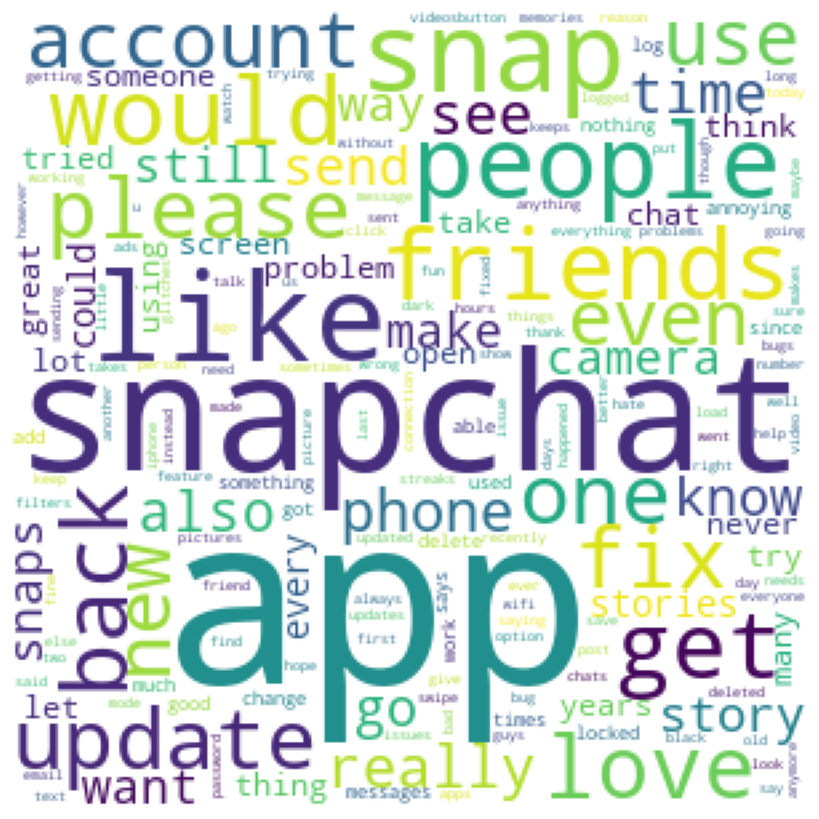

In [14]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [15]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [16]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
app,11021,6354.182030
snapchat,10933,5857.727964
like,5276,5795.995791
snap,4335,5738.203750
people,3951,5280.814480


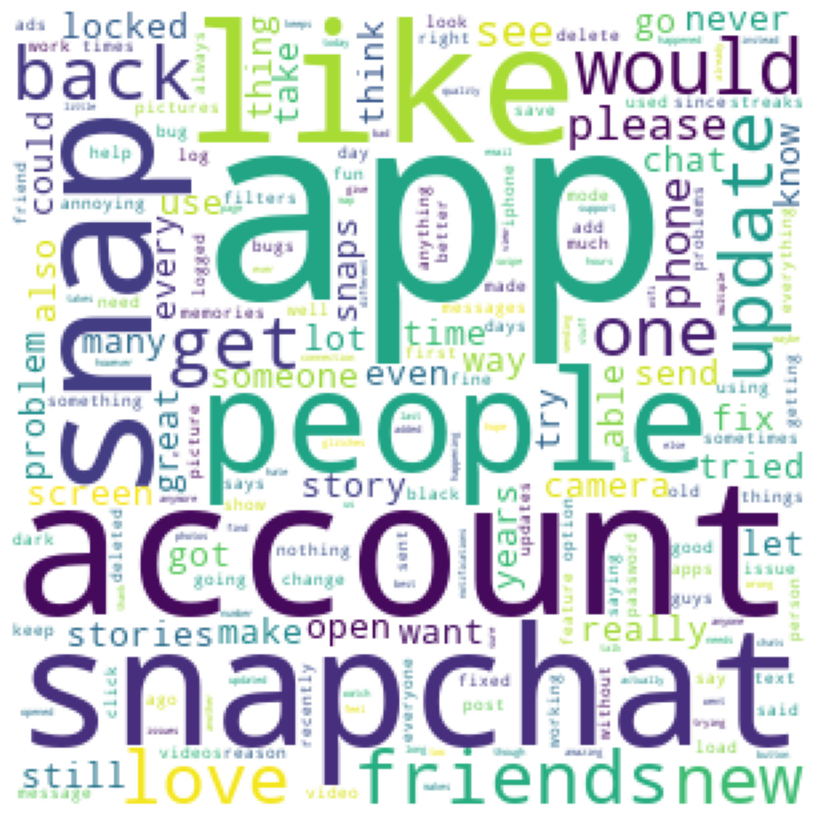

In [17]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 1970

In [18]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [19]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

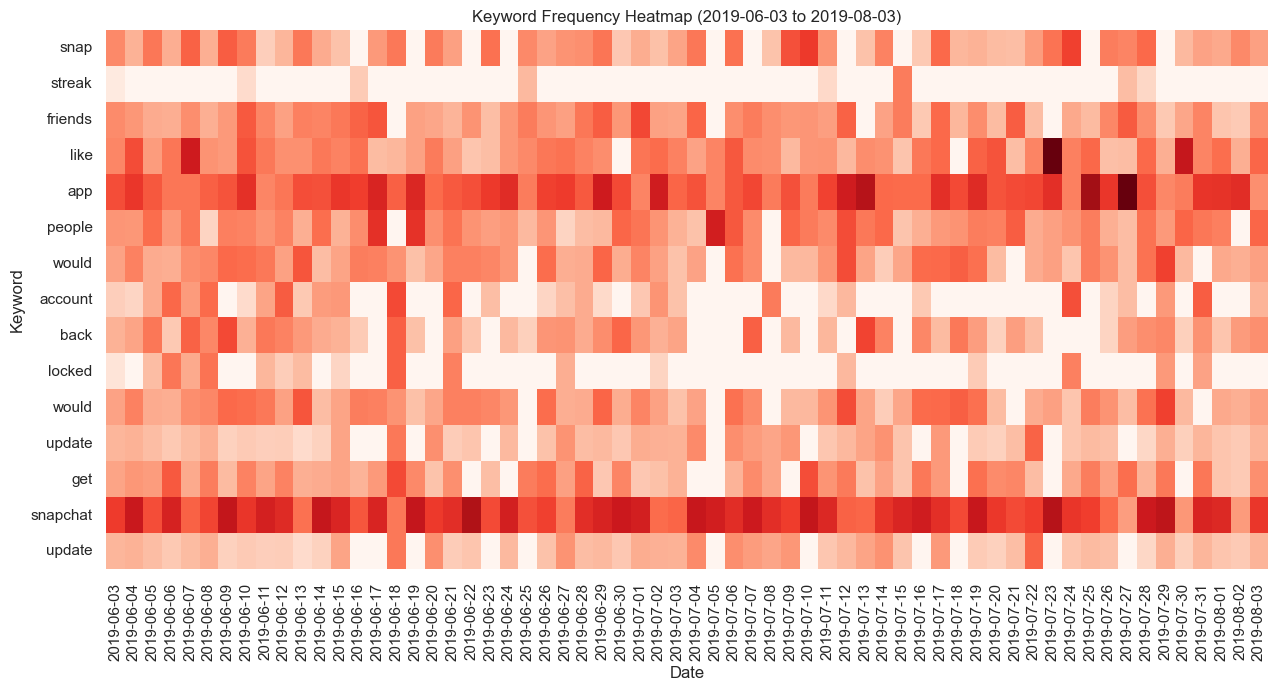

In [28]:
# Define a date range (replace 'start_date' and 'end_date' with your desired dates)
start_date = '2019-06-03'
end_date = '2019-8-03'

start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()

# Filter df based on the date range
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Calculate frequency of keywords
keywords = ['snap', 'streak', 'friends','like','app','people','would','account','back','locked','would','update','get','snapchat','update']
freq_df = count_keywords_by(df_filtered, by='date', keywords=keywords)
freq_df = freq_df.div(df_filtered.groupby('date')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)

# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
plt.title(f'Keyword Frequency Heatmap ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Keyword')
plt.show()